In [4]:
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 34.0 MB/s 
     |████████████████████████████████| 462 kB 71.2 MB/s 


In [5]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 37.1 MB/s 
     |████████████████████████████████| 596 kB 65.4 MB/s 
     |████████████████████████████████| 99 kB 8.5 MB/s 
     |████████████████████████████████| 1.1 MB 54.7 MB/s 
     |████████████████████████████████| 234 kB 71.8 MB/s 
     |████████████████████████████████| 1.2 MB 46.8 MB/s 
     |████████████████████████████████| 352 kB 76.8 MB/s 
     |████████████████████████████████| 47.8 MB 5.8 MB/s 
     |████████████████████████████████| 90 kB 11.0 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 


# Exploring and Cleaning the data

In [1]:
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('train_aug_in_kag_org.csv')

In [3]:
data.head(10)

,title,text,title_text,label
0,squirrel financial wellbeing,A Squirrel account makes it easy to stick to your budget and save. Start for free today!,squirrel financial wellbeing. A Squirrel account makes it easy to stick to your budget and save. Start for free today!,payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
1,senior insurance marketing,"Welcome to the home page of Senior Insurance Marketing, a full service brokerage specializing in Medicare and senior insurance products. Located in Lincoln, NE.","senior insurance marketing. Welcome to the home page of Senior Insurance Marketing, a full service brokerage specializing in Medicare and senior insurance products. Located in Lincoln, NE.",payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
2,3i financial group inc.,"A Small Boutique Firm Dedicated to Achieving Our Clients Goals.#sep#inform.invest.insure Get a Free, No Obligation Quote forAllYour Insurance Needs. 3i Financial offers a wide variety of insurance products to help suit your needs. Choose from individual, family, and group. GET A QUOTE TODAY Travel Insurance Get peace of mind with comprehensive travel insurance. Get a free quote today! Health & Dental Get affordable health Read more","3i financial group inc.. A Small Boutique Firm Dedicated to Achieving Our Clients Goals.#sep#inform.invest.insure Get a Free, No Obligation Quote forAllYour Insurance Needs. 3i Financial offers a wide variety of insurance products to help suit your needs. Choose from individual, family, and group. GET A QUOTE TODAY Travel Insurance Get peace of mind with comprehensive travel insurance. Get a free quote today! Health & Dental Get affordable health Read more",payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
3,brownstone insurance,"Brownstone Insurance provides master insurance policies for multi-unit buildings throughout Massachusetts, as well as personal insurance products such as renter's insurance and homeowner's insurance.#sep#Brownstone Insurance provides master insurance policies for multi-unit \nbuildings throughout Massachusetts, as well as personal insurance products \nsuch as renter's insurance and homeowner's insurance.","brownstone insurance. Brownstone Insurance provides master insurance policies for multi-unit buildings throughout Massachusetts, as well as personal insurance products such as renter's insurance and homeowner's insurance.#sep#Brownstone Insurance provides master insurance policies for multi-unit \nbuildings throughout Massachusetts, as well as personal insurance products \nsuch as renter's insurance and homeowner's insurance.",payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
4,pacificwide lending,Learn more about Pacificwide Lending and our commercial & residential loan services in California.,pacificwide lending. Learn more about Pacificwide Lending and our commercial & residential loan services in California.,payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
5,city auto finance,"City Auto Finance is the Southeast's most trusted used-car floor plan financing company with locations in Memphis, TN; Mobile, AL; Huntsville, AL and Murfreesboro, TN. We provide you with competitive rates and the capability to make payments online.","city auto finance. City Auto Finance is the Southeast's most trusted used-car floor plan financing company with locations in Memphis, TN; Mobile, AL; Huntsville, AL and Murfreesboro, TN. We provide you with competitive rates and the capability to make payments online.",payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
6,"veterans financial, inc.","VA Aid and Attendance benefit can help pay for assisted living, home care or nursing home. Veterans Financial Inc can advise you at no cost about benefits","veterans financial, inc.. VA Aid and Attendance benefit can help pay for assisted living, home care or nursing home. Veterans Financial Inc can advise you at no cost 

In [4]:
data.shape

(34953, 4)

In [5]:
data.isnull().sum()

title         42
text           0
title_text     0
label          0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.drop(columns=['title', 'text'], inplace=True)

In [8]:
data.head()

,title_text,label
0,squirrel financial wellbeing. A Squirrel account makes it easy to stick to your budget and save. Start for free today!,payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
1,"senior insurance marketing. Welcome to the home page of Senior Insurance Marketing, a full service brokerage specializing in Medicare and senior insurance products. Located in Lincoln, NE.",payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
2,"3i financial group inc.. A Small Boutique Firm Dedicated to Achieving Our Clients Goals.#sep#inform.invest.insure Get a Free, No Obligation Quote forAllYour Insurance Needs. 3i Financial offers a wide variety of insurance products to help suit your needs. Choose from individual, family, and group. GET A QUOTE TODAY Travel Insurance Get peace of mind with comprehensive travel insurance. Get a free quote today! Health & Dental Get affordable health Read more",payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
3,"brownstone insurance. Brownstone Insurance provides master insurance policies for multi-unit buildings throughout Massachusetts, as well as personal insurance products such as renter's insurance and homeowner's insurance.#sep#Brownstone Insurance provides master insurance policies for multi-unit \nbuildings throughout Massachusetts, as well as personal insurance products \nsuch as renter's insurance and homeowner's insurance.",payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing
4,pacificwide lending. Learn more about Pacificwide Lending and our commercial & residential loan services in California.,payment-credit-card-balance-euro-dollars-credit-debit-receipt-billing


# Preparing our data for modeling 

In [9]:
# import re
# import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

In [10]:
# # text
# text_corpus = []
# lm = WordNetLemmatizer()
# words = stopwords.words('english')

# for i in range(data.shape[0]):
#     row = re.sub('[^a-zA-Z\s]', '', data.iloc[i, 0]).lower()
#     row = row.split()  
#     row = [lm.lemmatize(word) for word in row if word not in words]
#     row = ' '.join(row)
#     text_corpus.append(row)

In [11]:
# len(text_corpus)

In [12]:
# text_corpus[0]

_Our Bag of Words_

In [13]:
# X = np.array(text_corpus)
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [14]:
X.shape, y.shape

((34911,), (34911,))

In [15]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

# Preparing for modeling 

In [17]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
X_train.shape, X_val.shape

((27928,), (6983,))

# Modeling

In [19]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

In [20]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [21]:
def build_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = outputs['pooled_output']
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(15, activation='softmax', name='classifier')(net)
    return tf.keras.Model(text_input, net)

In [22]:
model = build_classifier_model()

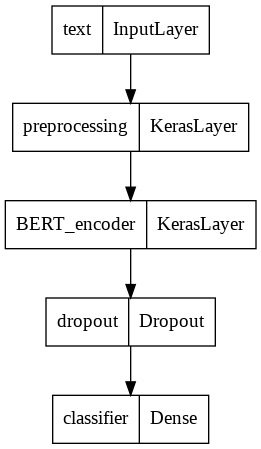

In [23]:
tf.keras.utils.plot_model(model)

In [24]:
X_train.shape

(27928,)

In [25]:
epochs = 5
steps_per_epoch = 27928//256
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [26]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = epochs, batch_size=256) 

Epoch 1/5
110/110 [==============================] - 396s 4s/step - loss: 1.4434 - accuracy: 0.5731 - val_loss: 0.4698 - val_accuracy: 0.8720
Epoch 2/5
110/110 [==============================] - 390s 4s/step - loss: 0.4267 - accuracy: 0.8827 - val_loss: 0.3673 - val_accuracy: 0.8960
Epoch 3/5
110/110 [==============================] - 413s 4s/step - loss: 0.3325 - accuracy: 0.9065 - val_loss: 0.3288 - val_accuracy: 0.9065
Epoch 4/5
110/110 [==============================] - 393s 4s/step - loss: 0.2842 - accuracy: 0.9207 - val_loss: 0.3096 - val_accuracy: 0.9118
Epoch 5/5
110/110 [==============================] - 389s 4s/step - loss: 0.2602 - accuracy: 0.9264 - val_loss: 0.3037 - val_accuracy: 0.9138


In [29]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

columns = ['Accuracy', 'Precision-MacroAVG', 'Precision-WeightedAVG', 'Recall-MacroAVG', 'Recall-WeightedAVG', 
           'F1_score-MacroAVG','F1_score-WeightedAVG']

y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

record = {}
record['Accuracy'] = accuracy_score(y_val, y_pred)*100
record['Precision-MacroAVG'] = precision_score(y_val, y_pred, average='macro')*100
record['Precision-WeightedAVG'] = precision_score(y_val, y_pred, average='weighted')*100
record['Recall-MacroAVG'] = recall_score(y_val, y_pred, average='macro')*100
record['Recall-WeightedAVG'] = recall_score(y_val, y_pred, average='weighted')*100
record['F1_score-MacroAVG'] = f1_score(y_val, y_pred, average='macro')*100
record['F1_score-WeightedAVG'] = f1_score(y_val, y_pred, average='weighted')*100

results = pd.Series(record, index=columns)

In [30]:
results

Accuracy                 91.379063
Precision-MacroAVG       80.153800
Precision-WeightedAVG    91.287547
Recall-MacroAVG          80.410014
Recall-WeightedAVG       91.379063
F1_score-MacroAVG        80.265559
F1_score-WeightedAVG     91.310786
dtype: float64

In [47]:
model.save('BERT', include_optimizer=False)

INFO:tensorflow:Assets written to: BERT/assets


INFO:tensorflow:Assets written to: BERT/assets


In [53]:
!zip -r BERT_model.zip BERT

  adding: BERT/ (stored 0%)
  adding: BERT/keras_metadata.pb (deflated 85%)
  adding: BERT/assets/ (stored 0%)
  adding: BERT/assets/vocab.txt (deflated 53%)
  adding: BERT/variables/ (stored 0%)
  adding: BERT/variables/variables.index (deflated 75%)
  adding: BERT/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: BERT/saved_model.pb (deflated 92%)


# Testing on test_data

In [32]:
test_data = pd.read_csv('test_in_kag_org.csv')

In [33]:
test_data.shape

(6501, 4)

In [34]:
test_data.isnull().sum()

title         0
text          0
title_text    0
label         0
dtype: int64

In [35]:
test_data.drop(columns=['title', 'text'], inplace=True)

# Preparing our data for modeling 

In [36]:
# # text
# text_corpus_test = []
# lm = WordNetLemmatizer()
# words = stopwords.words('english')

# for i in range(test_data.shape[0]):
#     row = re.sub('[^a-zA-Z\s]', '', test_data.iloc[i, 0]).lower()
#     row = row.split()  
#     row = [lm.lemmatize(word) for word in row if word not in words]
#     row = ' '.join(row)
#     text_corpus_test.append(row)

In [37]:
# len(text_corpus_test)

In [38]:
# text_corpus_test[0]

_Our Bag of Words_

In [40]:
X_test = test_data.iloc[:, 0]
y_test = test_data.iloc[:, 1].values

In [41]:
X_test.shape, y_test.shape

((6501,), (6501,))

In [42]:
y_test = le.transform(y_test)

In [43]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [49]:
loaded_model = tf.keras.models.load_model('BERT')

In [50]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

record = {}
record['Accuracy'] = accuracy_score(y_test, y_pred)*100
record['Precision-MacroAVG'] = precision_score(y_test, y_pred, average='macro')*100
record['Precision-WeightedAVG'] = precision_score(y_test, y_pred, average='weighted')*100
record['Recall-MacroAVG'] = recall_score(y_test, y_pred, average='macro')*100
record['Recall-WeightedAVG'] = recall_score(y_test, y_pred, average='weighted')*100
record['F1_score-MacroAVG'] = f1_score(y_test, y_pred, average='macro')*100
record['F1_score-WeightedAVG'] = f1_score(y_test, y_pred, average='weighted')*100

results = pd.Series(record, index=columns)
results

Accuracy                 92.647285
Precision-MacroAVG       73.709196
Precision-WeightedAVG    92.799783
Recall-MacroAVG          75.857184
Recall-WeightedAVG       92.647285
F1_score-MacroAVG        74.405650
F1_score-WeightedAVG     92.645764
dtype: float64

In [51]:
y_pred = loaded_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

record = {}
record['Accuracy'] = accuracy_score(y_test, y_pred)*100
record['Precision-MacroAVG'] = precision_score(y_test, y_pred, average='macro')*100
record['Precision-WeightedAVG'] = precision_score(y_test, y_pred, average='weighted')*100
record['Recall-MacroAVG'] = recall_score(y_test, y_pred, average='macro')*100
record['Recall-WeightedAVG'] = recall_score(y_test, y_pred, average='weighted')*100
record['F1_score-MacroAVG'] = f1_score(y_test, y_pred, average='macro')*100
record['F1_score-WeightedAVG'] = f1_score(y_test, y_pred, average='weighted')*100

results = pd.Series(record, index=columns)
results

Accuracy                 92.647285
Precision-MacroAVG       73.709196
Precision-WeightedAVG    92.799783
Recall-MacroAVG          75.857184
Recall-WeightedAVG       92.647285
F1_score-MacroAVG        74.405650
F1_score-WeightedAVG     92.645764
dtype: float64